# Artificial Intelligence I
## Assignment 1 - Alexander Stradnic - 119377263

### Importing packages, loading dataset

In [90]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Fundamentals
import pandas as pd
import numpy as np

# Plotting
from pandas.plotting import scatter_matrix
from seaborn import scatterplot

# Data splitting
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

# Models to be used
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Scalers, imputers, and transformers
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# One hot encodng
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Error calculation
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
df = pd.read_csv("../datasets/dataset_salaries.csv")
# Shuffle the dataset
df = df.sample(frac=1, random_state=2)
df.reset_index(drop=True, inplace=True)
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,11/3/2020 10:26:30,Microsoft,60,Data Scientist,181,"Redmond, WA",1,1,ML / AI,104,47,30,Male,mckeiaps hash ghaart gronds wuit zearts tsiott...,11521,819.0,47529
1,8/14/2018 21:08:29,VMware,Senior MTS,Software Engineer,0,"Palo Alto, CA",5,3,Full Stack,0,0,0,NaN,NaN,7351,807.0,1418
2,5/18/2019 0:32:17,Paypal,T25,Software Engineer,213,"San Francisco, CA",7,1,API Development (Back-End),180,19,14,Male,NaN,7419,807.0,8815
3,8/3/2021 20:25:07,Trend Micro,Senior Engineer,Software Engineer,18,"Taipei, TP, Taiwan",2,2,Distributed Systems (Back-End),14,1,3,Male,mcclieusp hyoully preebly gloiands screoch sch...,6744,0.0,81297
4,5/3/2021 15:25:42,Visa,Senior Software Engineer,Software Engineer,179,"Austin, TX",3,0,Full Stack,158,9,12,Female,dyniawn cauny spliur cleals crungs kwoiw thrai...,10965,635.0,68303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,3/3/2021 14:14:45,Nvidia,IC4,Hardware Engineer,315,"Santa Clara, CA",9,3,Verification,170,145,0,Male,gleep dreest shruows cuoms mcgoims xends schai...,7434,807.0,59912
62638,9/10/2020 8:53:01,Qualcomm,Principal Engineer,Hardware Engineer,242,"Austin, TX",15,13,ASIC Design,114,87,41,Male,mcdoady,10965,635.0,40548
62639,4/22/2019 13:18:06,Microsoft,61,Software Engineer,83,"Redmond, WA",6,1,Full Stack,72,4,7,Male,NaN,11521,819.0,8020
62640,11/3/2020 19:56:58,Google,L3,Business Analyst,107,"Tokyo, TY, Japan",3,1,Technical,88,12,7,Male,viaorry pfaiasm mcclims roind tueght smeingly ...,4364,0.0,47586


# Choosing features

I decide to select the following numeric and nominal features that I think correlate with the expected salary, including :
- years of experience
- location
- company
- tag (area of expertise)

In [105]:

numeric_features = ['yearsofexperience', 'yearsatcompany']
nominal_features = ['title', 'location', 'level', 'tag', 'dmaid', 'cityid', 'company']

# target_features = ['basesalary', 'bonus', 'stockgrantvalue']
target_features = ['basesalary']

features = numeric_features + nominal_features + target_features

# df_filtered = (df[df['basesalary'] > 0]).copy()

df2 = pd.DataFrame(df,
                         columns = features) 

df2

,yearsofexperience,yearsatcompany,title,location,level,tag,dmaid,cityid,company,basesalary
0,1,1,Data Scientist,"Redmond, WA",60,ML / AI,819.0,11521,Microsoft,104
1,5,3,Software Engineer,"Palo Alto, CA",Senior MTS,Full Stack,807.0,7351,VMware,0
2,7,1,Software Engineer,"San Francisco, CA",T25,API Development (Back-End),807.0,7419,Paypal,180
3,2,2,Software Engineer,"Taipei, TP, Taiwan",Senior Engineer,Distributed Systems (Back-End),0.0,6744,Trend Micro,14
4,3,0,Software Engineer,"Austin, TX",Senior Software Engineer,Full Stack,635.0,10965,Visa,158
...,...,...,...,...,...,...,...,...,...,...
62637,9,3,Hardware Engineer,"Santa Clara, CA",IC4,Verification,807.0,7434,Nvidia,170
62638,15,13,Hardware Engineer,"Austin, TX",Principal Engineer,ASIC Design,635.0,10965,Qualcomm,114
62639,6,1,Software Engineer,"Redmond, WA",61,Full Stack,819.0,11521,Microsoft,72
62640,3,1,Business Analyst,"Tokyo, TY, Japan",L3,Technical,0.0,4364,Google,88


In [106]:
# Split off the test set: 20% of the dataset.
dev_df, test_df = train_test_split(df2, train_size=0.8, random_state=2)

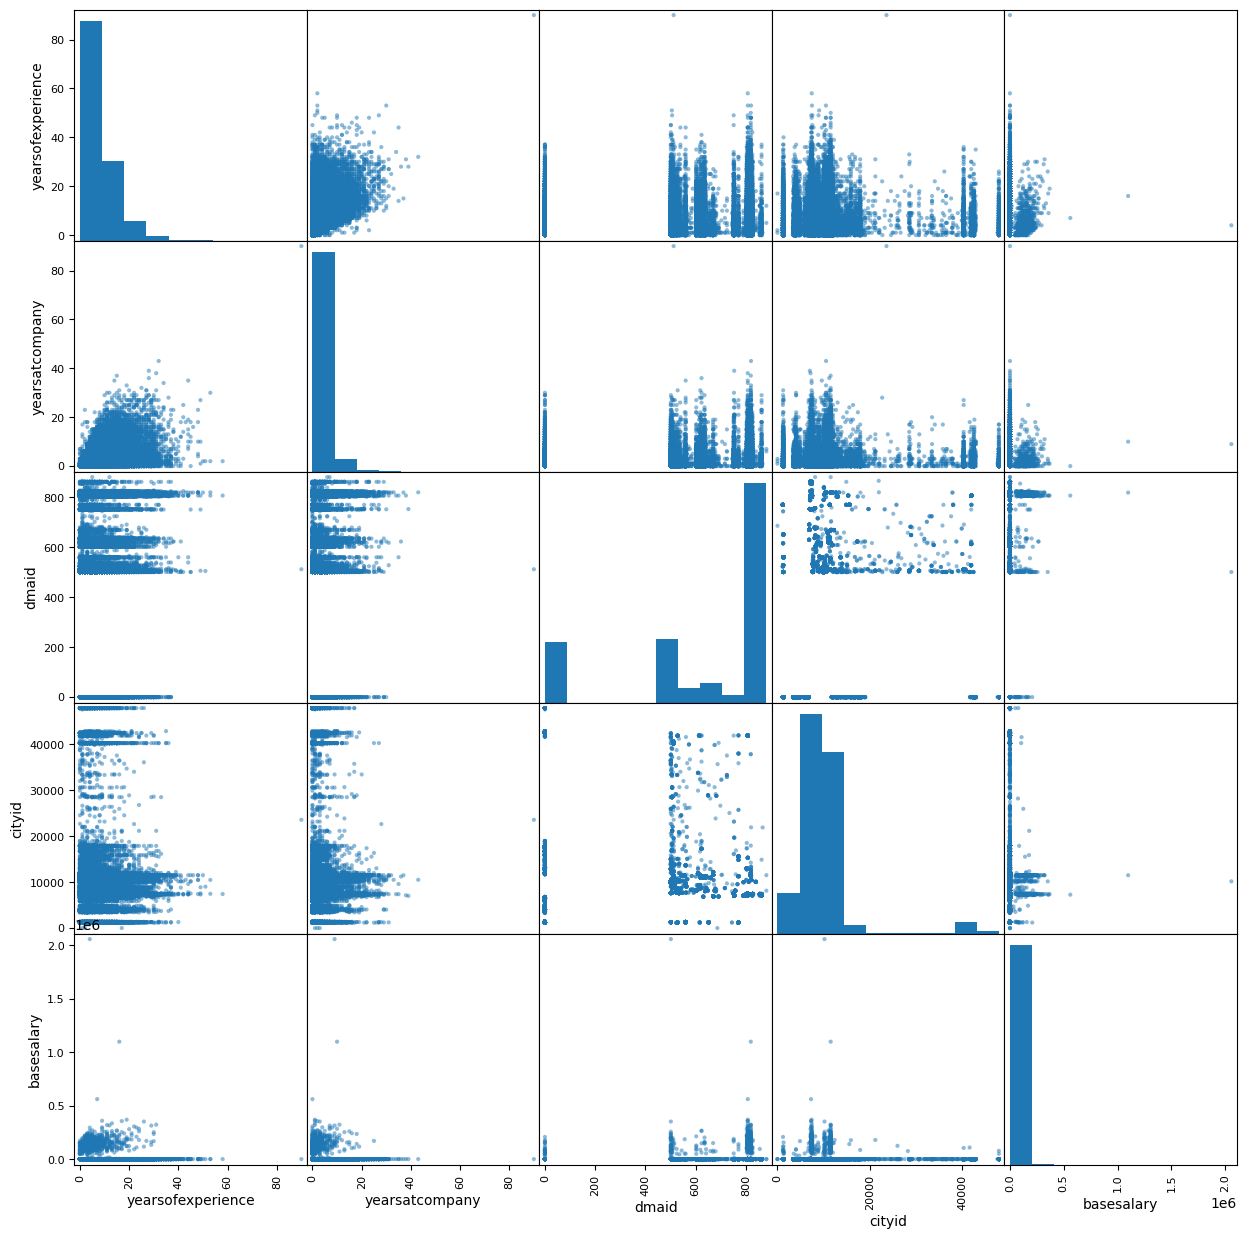

In [107]:
m = scatter_matrix(dev_df, figsize=(15, 15))

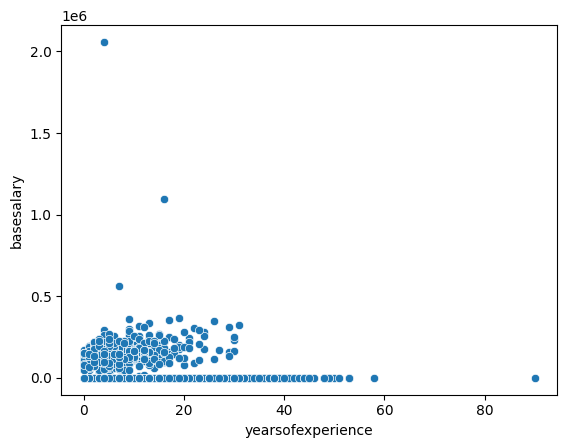

In [108]:
plot = scatterplot(x="yearsofexperience", y="basesalary", data=dev_df)

In [109]:
# Extract the features but leave as a DataFrame
dev_X = dev_df[features]
test_X = test_df[features]

# Target values, converted to a 1D numpy array
dev_y = dev_df["basesalary"].values
test_y = test_df["basesalary"].values

# dev_y = pd.DataFrame(dev_df,
#                          columns = target_features)
# test_y = pd.DataFrame(test_df,
#                          columns = target_features)

In [110]:
# Create preprocessor with params, feature engineering perhaps
# preprocessor = ColumnTransformer([
#         ("features", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="mean"))]), 
#                      features)],
#         remainder="passthrough")


# Create the preprocessor
preprocessor = ColumnTransformer([
        ("scaler", StandardScaler(), 
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), 
                          ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
                nominal_features)],
        remainder="passthrough")

In [111]:
# Grid Search (using holdout for the validation errors)
ss = ShuffleSplit(n_splits=1, train_size=0.75, random_state=2)

# Create a pipeline that combines the preprocessor with kNN
knn_model = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsRegressor())])

# Create a dictionary of hyperparameters and values to try
param_grid = {"predictor__n_neighbors" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Create the grid search object which will find the best hyperparameter values based on validation error
knn_gs = GridSearchCV(knn_model, param_grid, scoring="neg_mean_absolute_error", cv=ss)

# Run grid search by calling fit
knn_gs.fit(dev_X, dev_y)

# Let's see how well we did
knn_gs.best_params_, knn_gs.best_score_


({'predictor__n_neighbors': 3}, -5.538803309654927)

In [112]:
# kNN error estimation (using holdout 3:1 and n_neighbors=3)
ss = ShuffleSplit(n_splits=1, train_size=0.75, random_state=2)

# kNN pipeline
knn_model = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsRegressor(n_neighbors=3))])

cross_val_score(knn_model, dev_X, dev_y, scoring="neg_mean_absolute_error", cv=ss)

array([-5.53880331])

In [113]:
mean_absolute_error(test_y, knn_gs.predict(test_X))

38.04110463724162

In [114]:
# Create a pipeline that combines the preprocessor with linear regression
ols = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", LinearRegression())])

# Create a dictionary of hyperparameters
# ols_param_grid = {"preprocessor__features__wcr2__insert": [True, False], "preprocessor__features__swr__insert":[True, False], "preprocessor__features__csr__insert":[True, False],  "preprocessor__features__cfr__insert":[True, False]}

# Create the grid search object which will find the best hyperparameter values based on validation error
# ols_gs = GridSearchCV(ols, ols_param_grid, scoring="neg_mean_absolute_error", cv=10, refit=True)

# Run grid search by calling fit. . It will also re-train on train+validation using the best parameters.
ols.fit(dev_X, dev_y)

# Let's see how well we did
# ols.best_params_, ols_gs.best_score_

# Now test on the test set
mean_absolute_error(dev_y, ols.predict(dev_X))

1.2089469890965955e-06

In [115]:
# Create a pipeline that combines the preprocessor with ridge regression
ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", Ridge())])

# # Create a dictionary of hyperparameters for ridge regression
# ridge_param_grid = {"preprocessor__num__room_size__insert": [True, False],
#                     "predictor__alpha": [0, 45.0, 50.0, 55.0]}

# Create the grid search object which will find the best hyperparameter values based on validation error
# ridge_gs = GridSearchCV(ridge, ridge_param_grid, scoring="neg_mean_absolute_error", cv=10, refit=True)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
# ridge_gs.fit(dev_X, dev_y)
# Let's see how well we did
# ridge_gs.best_params_, ridge_gs.best_score_

ridge.fit(dev_X, dev_y)

mean_absolute_error(dev_y, ridge.predict(dev_X))

1.2089051614094345e-06

In [116]:
# RIDGE REGRESSION ON THE TEST SET
mean_absolute_error(test_y, ridge.predict(test_X))

1.234008389916495e-06

In [104]:
knn.set_params(**knn_gs.best_params_) 
scores = cross_validate(knn, dev_X, dev_y, cv=10, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

NameError: name 'knn' is not defined